In [13]:
import pandas as pd
import seaborn as sns 

In [14]:
sliver_df = pd.read_csv('sliver.csv')

In [15]:
sliver_df

,Chromosome Position,Start Position,End Position,Sequence
0,Chr1,10001,10074,TAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAAC...
1,Chr20,60061,60183,GGGAGAGGGGTGGAGGGGAGACTAGAGAGGTGGGTAGGAATACTGG...
2,Chr3,10060,10070,CTAACCCTAA


In [16]:
# plot for lengths of sliver sequence
def returnLength(seq):
    return len(seq)

sliver_df['length'] = sliver_df['Sequence'].apply(returnLength)
sliver_df

,Chromosome Position,Start Position,End Position,Sequence,length
0,Chr1,10001,10074,TAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAAC...,73
1,Chr20,60061,60183,GGGAGAGGGGTGGAGGGGAGACTAGAGAGGTGGGTAGGAATACTGG...,122
2,Chr3,10060,10070,CTAACCCTAA,10


<Axes: xlabel='length', ylabel='count'>

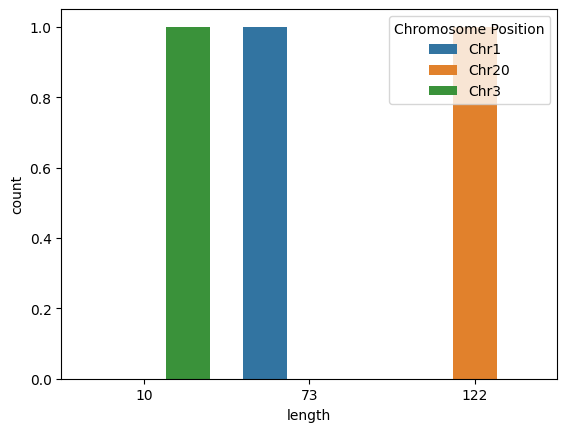

In [21]:
# plot distribution of lengths of sliver sequence, marked by its chrmosome position 
sns.countplot(data =sliver_df, x='length', hue='Chromosome Position')

<Axes: xlabel='length', ylabel='Count'>

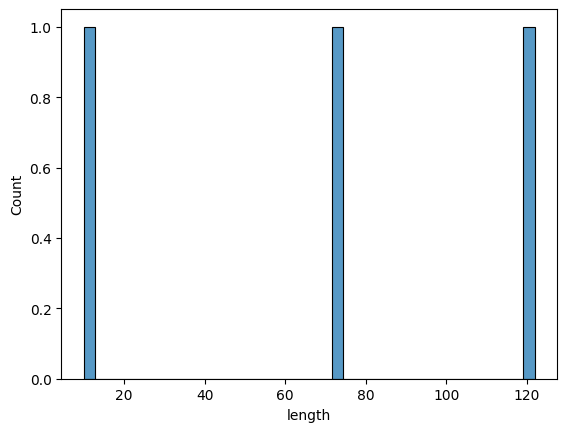

In [35]:
sns.histplot(data =sliver_df, x='length', bins=40)

<Axes: xlabel='Chromosome Position', ylabel='count'>

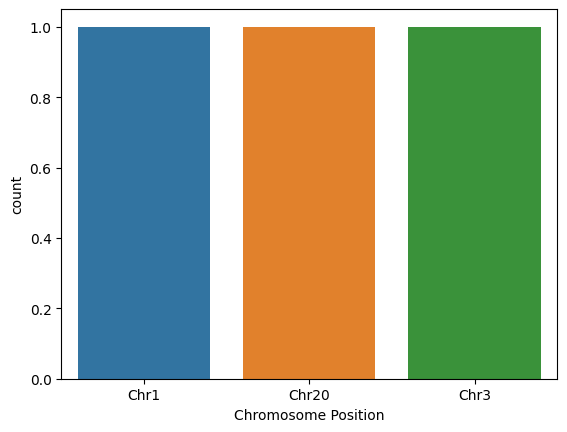

In [22]:
# plot how much sliver sequences are in each chromosome 
sns.countplot(data =sliver_df, x='Chromosome Position')

In [24]:
# find repetitive sequences
sliver_df.Sequence.value_counts()

Sequence
TAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCT                                                     1
GGGAGAGGGGTGGAGGGGAGACTAGAGAGGTGGGTAGGAATACTGGATTCCACTGACCACGTGCTGGATGTCATGCTTAGCCCTCCTGCTCTGTGCCAGGTTAGGCACCTGGTGTTTTACAT    1
CTAACCCTAA                                                                                                                    1
Name: count, dtype: int64

In [31]:
sequence_df = sliver_df.groupby('Sequence').count()[['length']]
sequence_df.columns = ['count']
sequence_df = sequence_df.reset_index().sort_values('count', ascending=False)
sequence_df

,Sequence,count
0,CTAACCCTAA,1
1,GGGAGAGGGGTGGAGGGGAGACTAGAGAGGTGGGTAGGAATACTGG...,1
2,TAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAAC...,1


<Axes: xlabel='count', ylabel='Sequence'>

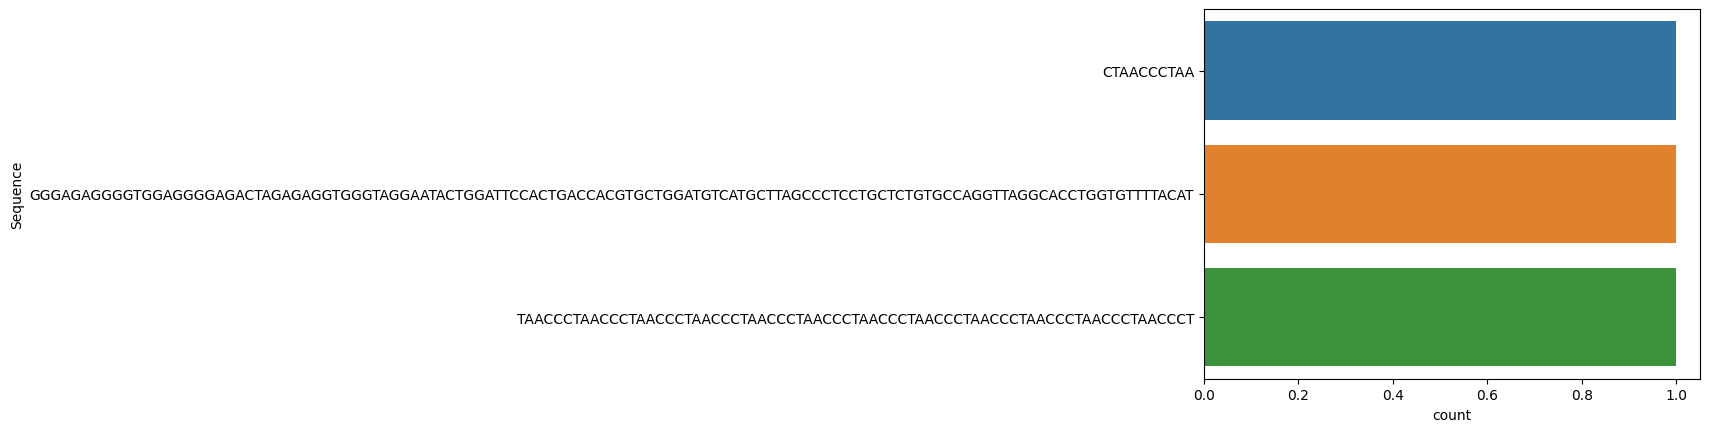

In [33]:
sns.countplot(data=sequence_df, y='Sequence')